In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

data_path = 'C:\\Users\\ifeng_wu\\Desktop\\File\\Testing\\'
df_train = pd.read_csv(data_path + 'train.csv')
df_test = pd.read_csv(data_path + 'test.csv')
pd.set_option('display.max_columns', 500)
df_train.shape

(1521787, 23)

In [2]:
df_train.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [3]:
df_train['loctm'].describe()

count    1.521787e+06
mean     1.463152e+05
std      5.212107e+04
min      0.000000e+00
25%      1.109310e+05
50%      1.515220e+05
75%      1.858270e+05
max      2.359590e+05
Name: loctm, dtype: float64

# Unique Value in each column

In [4]:
# Check all unique data
col = df_train.columns.values.tolist()
for col in df_train:
    if len(df_train[col].unique()) < 200:
        print(str(col) + ": " + str(df_train[col].unique()))
    else:
        print(str(col) + ": " + "might be continuous")

acqic: might be continuous
bacno: might be continuous
cano: might be continuous
conam: might be continuous
contp: [5 3 6 2 4 0 1]
csmcu: [ 0 62 74 61 13 67 60 26 49 10 71 56 20 38 22  4 47 54 75 32 66 29 28 14
 50 30 31 45 24 40 35 59  3 48 63 52 41 23 17 16 73 51 53 44 18 12 15  5
 70 21 39 27 42 11 72  6 25  7 43  2 19 37  1 64 57 36 68 55  9 46 34 69]
ecfg: ['N' 'Y']
etymd: [ 0  2  5  4  8  1  9  6  3  7 10]
flbmk: ['N' 'Y' nan]
flg_3dsmk: ['N' 'Y' nan]
fraud_ind: [0 1]
hcefg: [5 0 3 1 2 7 8 9 6]
insfg: ['N' 'Y']
iterm: [0 1 2 8 3 4 7 6 5]
locdt: [33  9  6  5  7 10  8 11 13 14 22 21 25 24 15 12 19 28 18 17 16 23 31 26
  2 30  4 20 27 29  1  3 34 66 32 67 70 69 65 35 39 43 38 45 48 54 50 68
 36 37 61 42 49 44 58 62 60 63 47 40 41 46 76 51 74 75 52 56 85 53 89 86
 73 55 57 59 79 78 72 71 64 80 81 84 77 82 87 88 83 90]
loctm: might be continuous
mcc: might be continuous
mchno: might be continuous
ovrlt: ['N' 'Y']
scity: might be continuous
stocn: [102  44  14  46  38  93 104  20  75  2

# Replacing the Binary from [N, Y] to [0,1]

In [5]:
#Replace all binary variable to [0,1]
df_train['ecfg'].replace(['N','Y'],[0,1],inplace=True)
df_train['flbmk'].replace(['N','Y'],[0,1],inplace=True)
df_train['flg_3dsmk'].replace(['N','Y'],[0,1],inplace=True)
df_train['insfg'].replace(['N','Y'],[0,1],inplace=True)
df_train['ovrlt'].replace(['N','Y'],[0,1],inplace=True)

# Fraud proportion

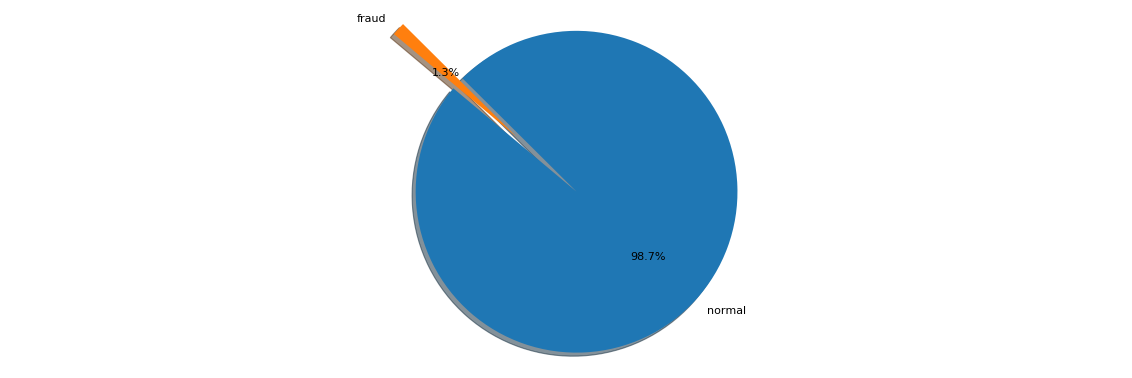

In [74]:
fraud_pie = df_train['fraud_ind'].value_counts()
explode = (0, 0.5)
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.pie(fraud_pie, explode=explode, labels=['normal','fraud'],
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# 1. The distribution of trading amount (conam)

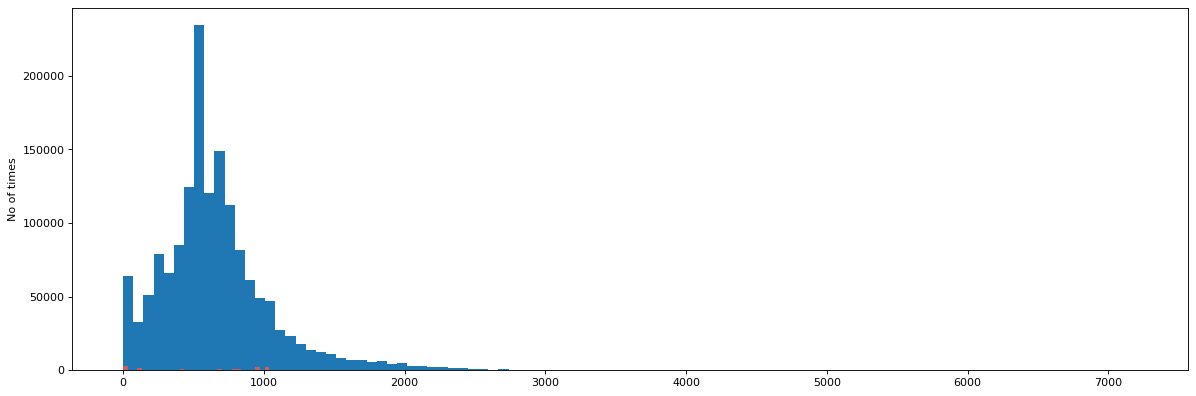

Skewness: 1.640142
Kurtosis: 6.514761


In [64]:
#plot conam --> 交易金額-台幣(經過轉換) 
fraud1 = df_train[df_train["fraud_ind"] == 1]
fraud0 = df_train[df_train["fraud_ind"] == 0]
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(df_train['conam'], bins=100, stacked=True)
plt.hist(fraud1['conam'], bins=100, color='indianred', stacked=True)
plt.ylabel('No of times')
plt.show()
print("Skewness: %f" % df_train['conam'].skew())
print("Kurtosis: %f" % df_train['conam'].kurt())

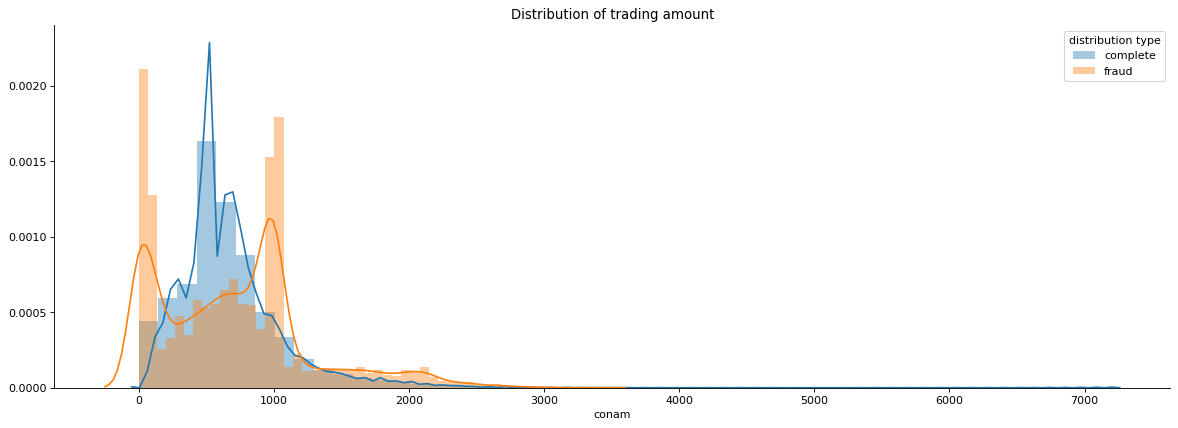

In [66]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(df_train['conam'], label='total')
sns.distplot(fraud1['conam'], label = 'fraud')
plt.legend(title='distribution type',loc='upper right', labels=['complete', 'fraud'])
plt.title("Distribution of trading amount")
sns.despine()

# 2. Fraud in different Binary variables

### ecgf -- online transactions

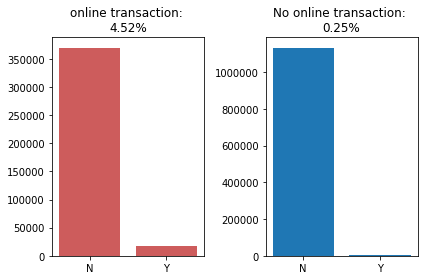

In [8]:
# comparing ecfg N & Y
ecfg1 = df_train[df_train["ecfg"] == 1]
ecfg0 = df_train[df_train["ecfg"] == 0]
x = ['N', 'Y']
fraud1 = ecfg1["fraud_ind"].value_counts()
fraud0 = ecfg0["fraud_ind"].value_counts()
plt.subplot(1, 2, 1)
plt.title('online transaction: \n' + str("{:.2f}".format(100*fraud1[1]/sum(fraud1))) + '%')
plt.bar(x,fraud1,color='indianred')
plt.subplot(1, 2, 2)
plt.title('No online transaction: \n' + str("{:.2f}".format(100*fraud0[1]/sum(fraud0))) + '%')
plt.bar(x,fraud0)
plt.tight_layout()
plt.show()

### flbmk -- Fallback

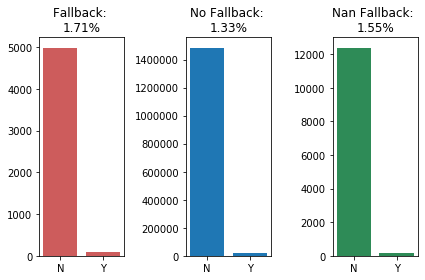

In [9]:
# comparing flbmk N & Y & nan
flbmk1 = df_train[df_train["flbmk"] == 1]
flbmk0 = df_train[df_train["flbmk"] == 0]
flbmk_nan = df_train[np.isnan(df_train["flbmk"])]
fraud1_flbmk = flbmk1["fraud_ind"].value_counts()
fraud0_flbmk = flbmk0["fraud_ind"].value_counts()
fraudnan_flbmk = flbmk_nan["fraud_ind"].value_counts()
plt.subplot(1, 3, 1)
plt.title('Fallback: \n' + str("{:.2f}".format(100*fraud1_flbmk[1]/sum(fraud1_flbmk))) + '%')
plt.bar(x,fraud1_flbmk,color='indianred')
plt.subplot(1, 3, 2)
plt.title('No Fallback: \n' + str("{:.2f}".format(100*fraud0_flbmk[1]/sum(fraud0_flbmk))) + '%')
plt.bar(x,fraud0_flbmk)
plt.subplot(1, 3, 3)
plt.title('Nan Fallback: \n' + str("{:.2f}".format(100*fraudnan_flbmk[1]/sum(fraudnan_flbmk))) + '%')
plt.bar(x,fraudnan_flbmk,color='seagreen')
plt.tight_layout()

### flg_3dsmk -- 3DS transaction

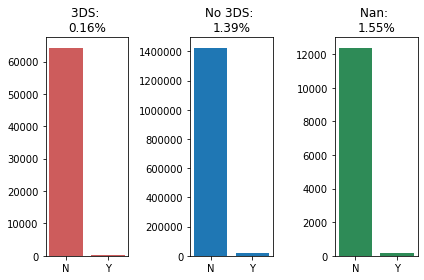

In [10]:
# comparing 3ds N & Y & nan
flg_3dsmk1 = df_train[df_train["flg_3dsmk"] == 1]
flg_3dsmk0 = df_train[df_train["flg_3dsmk"] == 0]
flg_3dsmk_nan = df_train[np.isnan(df_train["flg_3dsmk"])]
fraud1_flg_3dsmk = flg_3dsmk1["fraud_ind"].value_counts()
fraud0_flg_3dsmk = flg_3dsmk0["fraud_ind"].value_counts()
fraudnan_flg_3dsmk = flg_3dsmk_nan["fraud_ind"].value_counts()
plt.subplot(1, 3, 1)
plt.title('3DS: \n' + str("{:.2f}".format(100*fraud1_flg_3dsmk[1]/sum(fraud1_flg_3dsmk))) + '%')
plt.bar(x,fraud1_flg_3dsmk,color='indianred')
plt.subplot(1, 3, 2)
plt.title('No 3DS: \n' + str("{:.2f}".format(100*fraud0_flg_3dsmk[1]/sum(fraud0_flg_3dsmk))) + '%')
plt.bar(x,fraud0_flg_3dsmk)
plt.subplot(1, 3, 3)
plt.title('Nan: \n' + str("{:.2f}".format(100*fraudnan_flg_3dsmk[1]/sum(fraudnan_flg_3dsmk))) + '%')
plt.bar(x,fraudnan_flg_3dsmk,color='seagreen')
plt.tight_layout()

### insfg -- Installment transaction

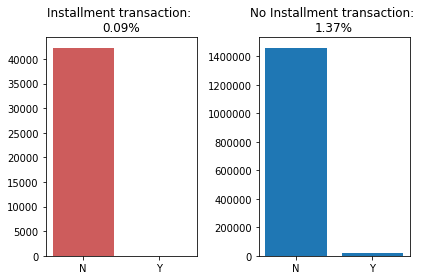

In [11]:
# comparing insfg N & Y & nan
insfg1 = df_train[df_train["insfg"] == 1]
insfg0 = df_train[df_train["insfg"] == 0]
fraud1_insfg = insfg1["fraud_ind"].value_counts()
fraud0_insfg = insfg0["fraud_ind"].value_counts()
plt.subplot(1, 2, 1)
plt.title('Installment transaction: \n' + str("{:.2f}".format(100*fraud1_insfg[1]/sum(fraud1_insfg))) + '%')
plt.bar(x,fraud1_insfg,color='indianred')
plt.subplot(1, 2, 2)
plt.title('No Installment transaction: \n' + str("{:.2f}".format(100*fraud0_insfg[1]/sum(fraud0_insfg))) + '%')
plt.bar(x,fraud0_insfg)
plt.tight_layout()

### ovrlt -- Excess trading

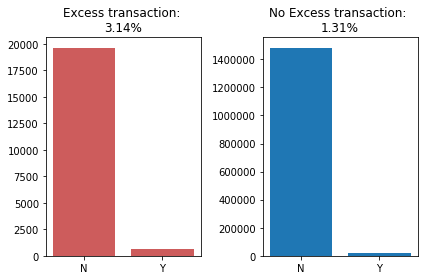

In [12]:
# comparing ovrlt N & Y & nan
ovrlt1 = df_train[df_train["ovrlt"] == 1]
ovrlt0 = df_train[df_train["ovrlt"] == 0]
fraud1_ovrlt = ovrlt1["fraud_ind"].value_counts()
fraud0_ovrlt = ovrlt0["fraud_ind"].value_counts()
plt.subplot(1, 2, 1)
plt.title('Excess transaction: \n' + str("{:.2f}".format(100*fraud1_ovrlt[1]/sum(fraud1_ovrlt))) + '%')
plt.bar(x,fraud1_ovrlt,color='indianred')
plt.subplot(1, 2, 2)
plt.title('No Excess transaction: \n' + str("{:.2f}".format(100*fraud0_ovrlt[1]/sum(fraud0_ovrlt))) + '%')
plt.bar(x,fraud0_ovrlt)
plt.tight_layout()

# 3. Fraud in different currencies

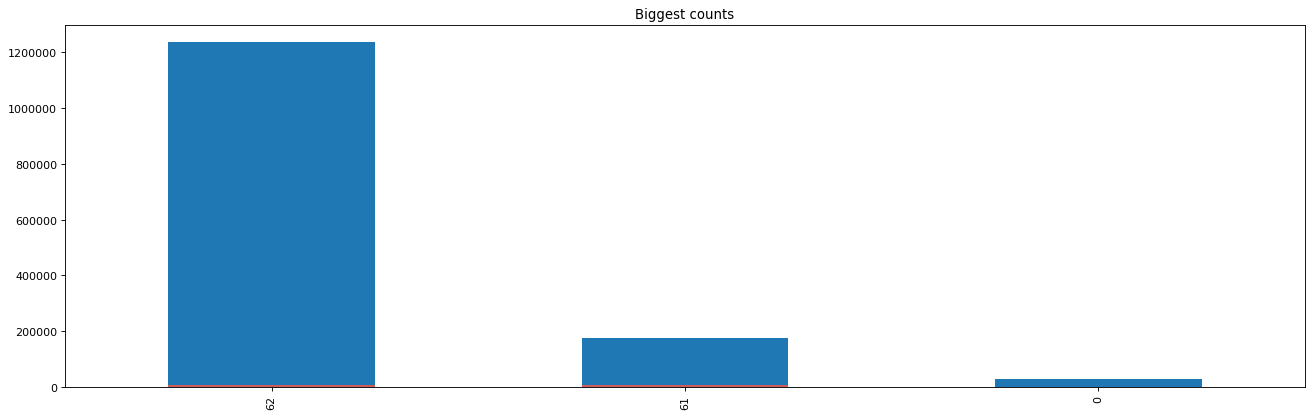

In [13]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
fraud1 = df_train[df_train["fraud_ind"] == 1]
fraud0 = df_train[df_train["fraud_ind"] == 0]
plt.title('Biggest counts')
fraud0.loc[df_train['csmcu'].isin([62,0,61])]['csmcu'].value_counts().plot(kind='bar', stacked=True)
fraud1.loc[df_train['csmcu'].isin([62,0,61])]['csmcu'].value_counts().plot(kind='bar', color = 'indianred', stacked=True)

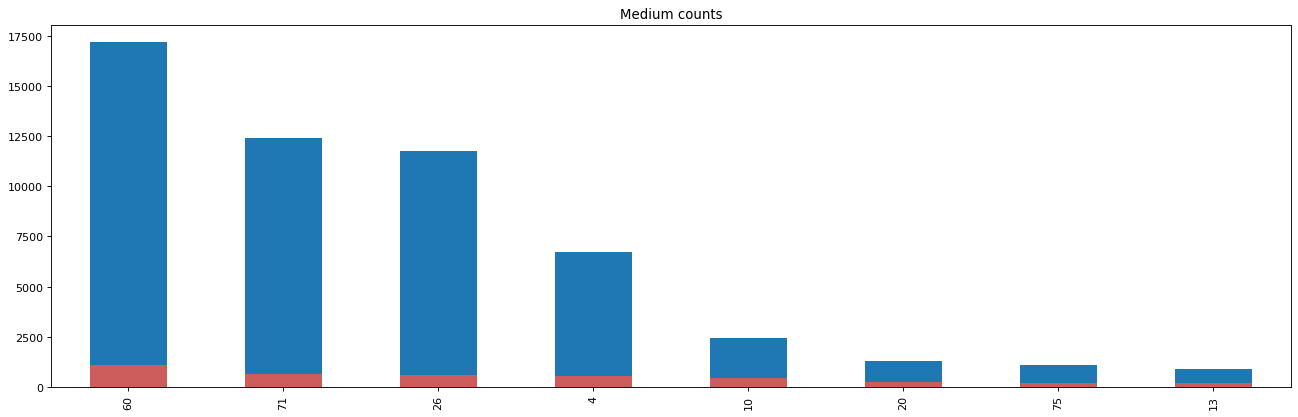

In [14]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Medium counts')
fraud0.loc[fraud0['csmcu'].isin([60,71,26,4,10,20,75,13])]['csmcu'].value_counts().plot(kind='bar', stacked=True)
fraud1.loc[fraud1['csmcu'].isin([60,71,26,4,10,20,75,13])]['csmcu'].value_counts().plot(kind='bar', color='indianred', stacked=True)

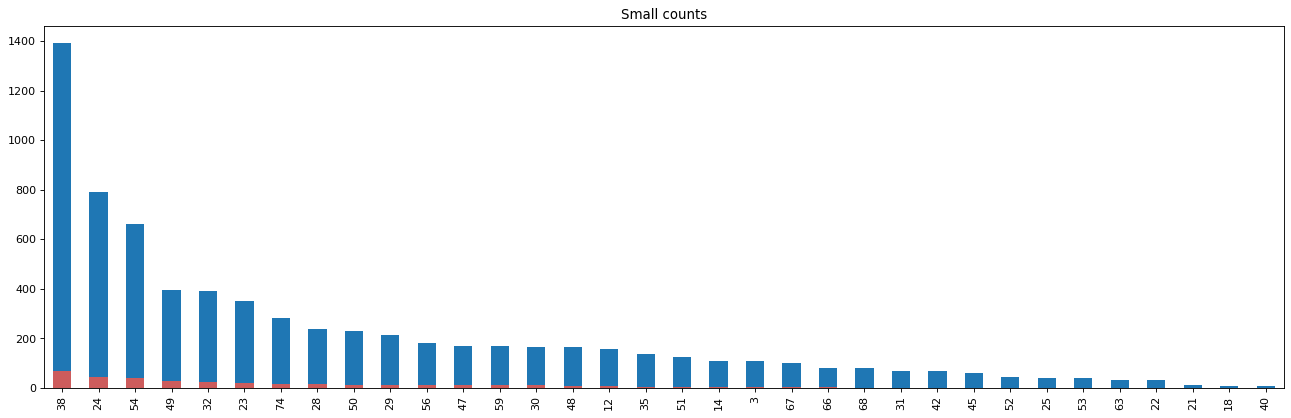

In [15]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Small counts')
fraud0.loc[~df_train['csmcu'].isin([62,0,61,60,71,26,4,10,20,75,13])]['csmcu'].value_counts().plot(kind='bar', stacked=True)
fraud1.loc[~df_train['csmcu'].isin([62,0,61,60,71,26,4,10,20,75,13])]['csmcu'].value_counts().plot(kind='bar', color = 'indianred', stacked=True)

# 4. Fraud in different types of payment (hcefg)

#### Some value missing due to 0% of fraud

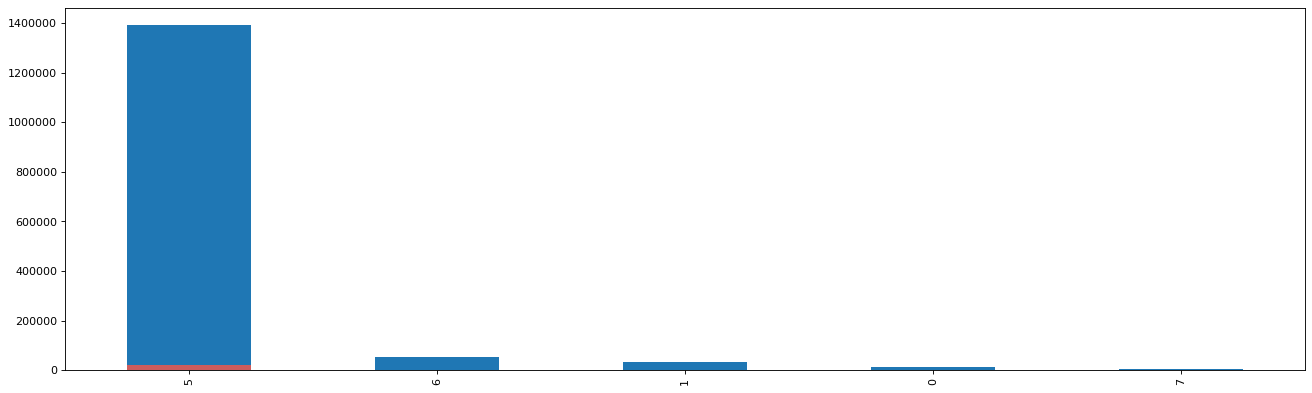

In [16]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
fraud0['hcefg'].value_counts().plot(kind='bar', stacked=True)
fraud1['hcefg'].value_counts().plot(kind='bar', color='indianred', stacked=True)

#### Fraud Proportion

In [17]:
fraud1['hcefg'].value_counts() / (fraud0['hcefg'].value_counts() + fraud1['hcefg'].value_counts())

0    0.000389
1    0.000787
2         NaN
3         NaN
5    0.014241
6    0.015500
7    0.002237
8         NaN
9         NaN
Name: hcefg, dtype: float64

# 5. Fraud in different status (stscd)

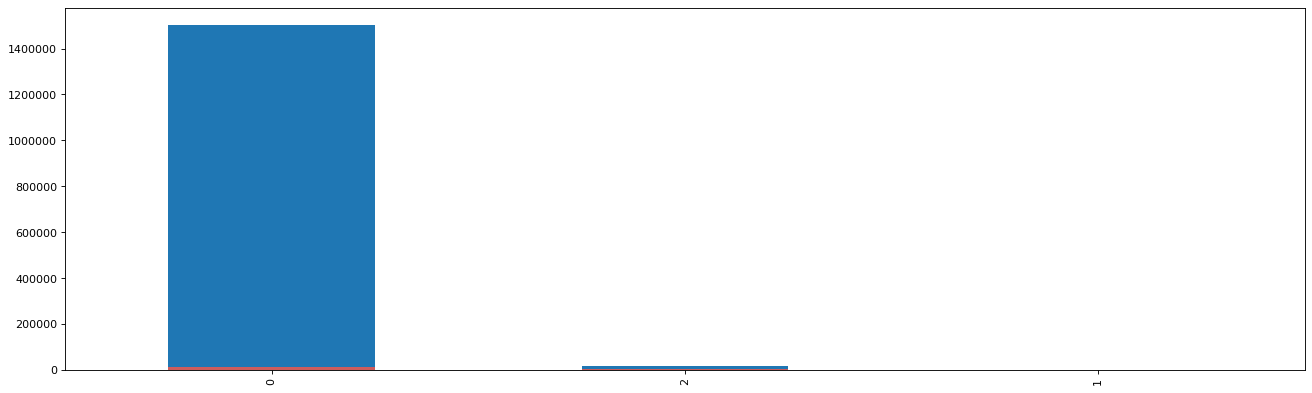

In [18]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
df_train['stscd'].value_counts().plot(kind='bar', stacked=True)
fraud1['stscd'].value_counts().plot(kind='bar', color='indianred', stacked=True)

### Take status 0 out to see details in  2 and 1

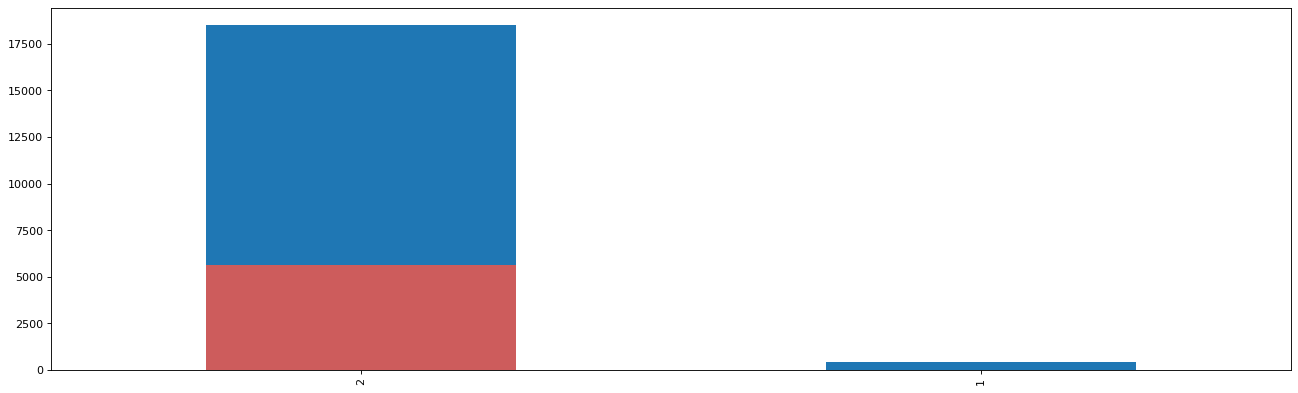

In [19]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
df_train.loc[~df_train['stscd'].isin([0])]['stscd'].value_counts().plot(kind='bar', stacked=True)
fraud1.loc[~fraud1['stscd'].isin([0])]['stscd'].value_counts().plot(kind='bar', color = 'indianred', stacked=True)

In [20]:
fraud1['stscd'].value_counts() / (fraud0['stscd'].value_counts() + fraud1['stscd'].value_counts())

0    0.009768
1    0.061275
2    0.305360
3         NaN
4         NaN
Name: stscd, dtype: float64

# 6. Fraud in different countries (stocn)

### Calculate the proportion

In [21]:
pd.options.display.max_rows = 10
fraud1['stocn'].value_counts() / df_train['stocn'].value_counts()

0      0.053435
1      0.289179
2      0.047273
3           NaN
4      0.051282
         ...   
102    0.000948
104    0.200979
105         NaN
106    0.002732
107         NaN
Name: stocn, Length: 103, dtype: float64

### Display proportion > 20%

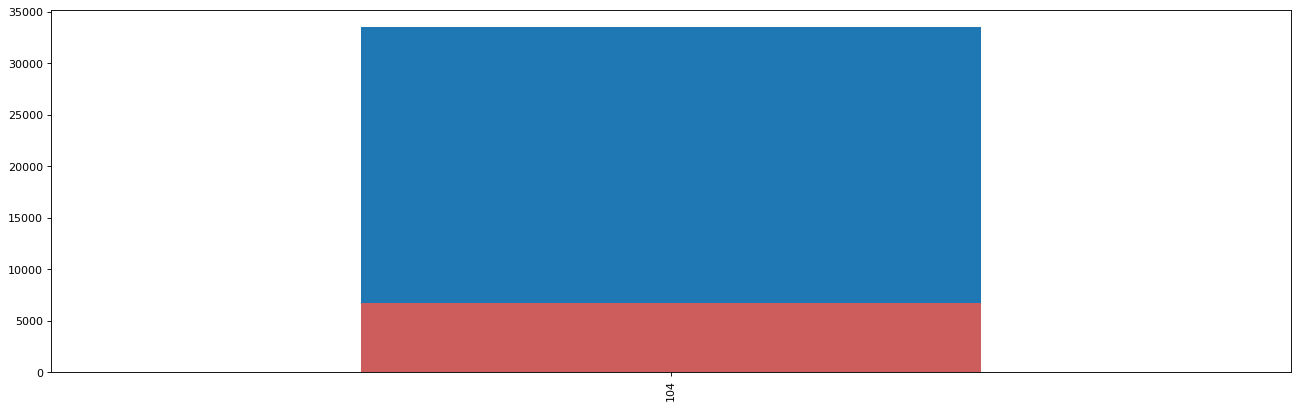

In [22]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
df_train.loc[df_train['stocn'].isin([104])]['stocn'].value_counts().plot(kind='bar', stacked=True)
fraud1.loc[fraud1['stocn'].isin([104])]['stocn'].value_counts().plot(kind='bar', color='indianred', stacked=True)

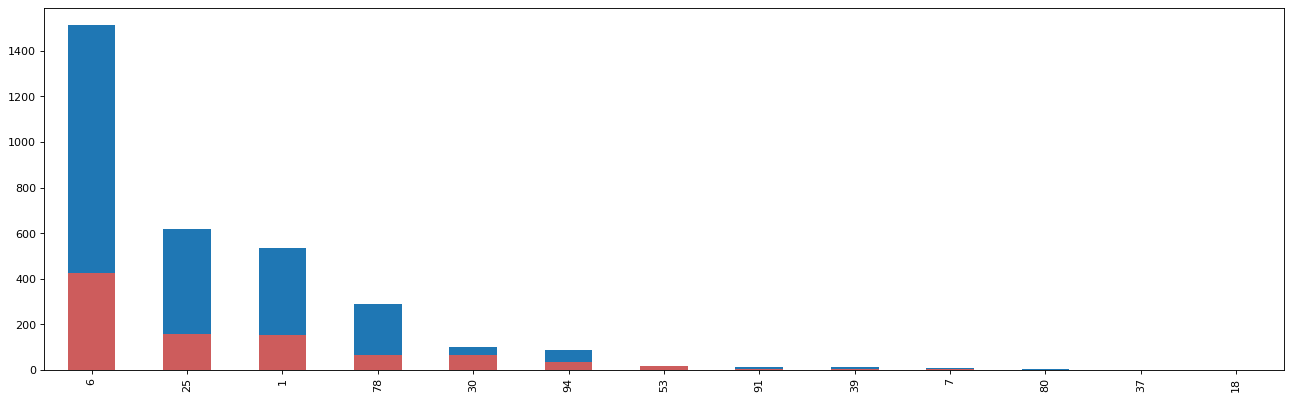

In [23]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
df_train.loc[df_train['stocn'].isin([1,6,7,18,25,30,37,39,53,78,80,91,94])]['stocn'].value_counts().plot(kind='bar', stacked=True)
fraud1.loc[fraud1['stocn'].isin([1,6,7,18,25,30,37,39,53,78,80,91,94])]['stocn'].value_counts().plot(kind='bar', color='indianred', stacked=True)

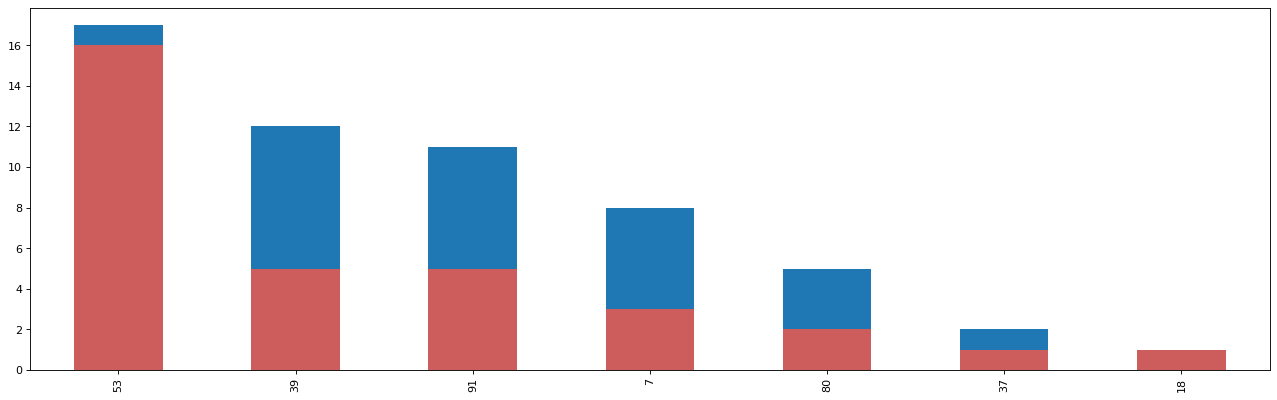

In [24]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
df_train.loc[df_train['stocn'].isin([7,18,37,39,53,80,91])]['stocn'].value_counts().plot(kind='bar', stacked=True)
fraud1.loc[fraud1['stocn'].isin([7,18,37,39,53,80,91])]['stocn'].value_counts().plot(kind='bar', color='indianred', stacked=True)

# 7. Different Installment length (iterm)

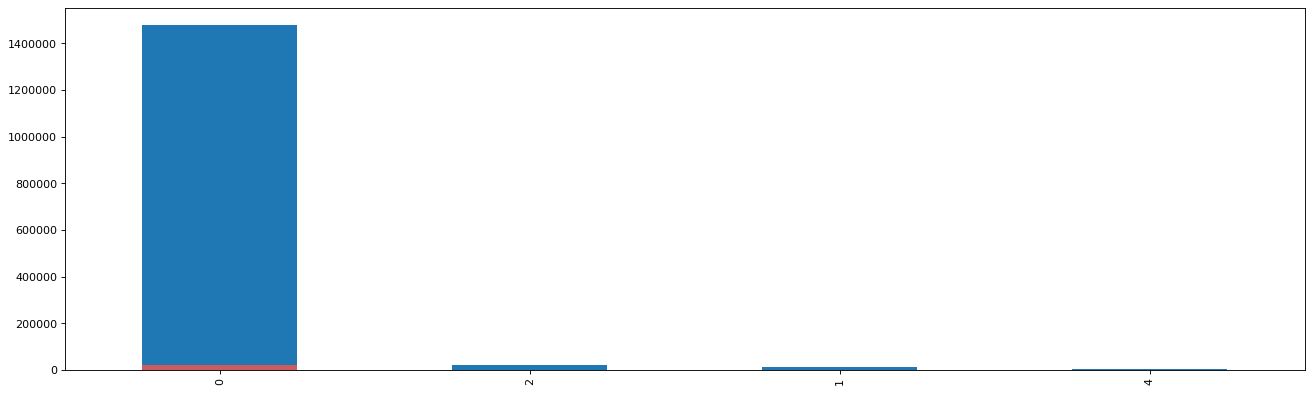

In [25]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
df_train['iterm'].value_counts().plot(kind='bar', stacked=True)
fraud1['iterm'].value_counts().plot(kind='bar', color='indianred', stacked=True)

In [26]:
fraud1['iterm'].value_counts() / df_train['iterm'].value_counts()

0    0.013733
1    0.000089
2    0.002260
3         NaN
4    0.000372
5         NaN
6         NaN
7         NaN
8         NaN
Name: iterm, dtype: float64

# 8. Distribution of trading date on complete & fraud data (90 bins) -- locdt

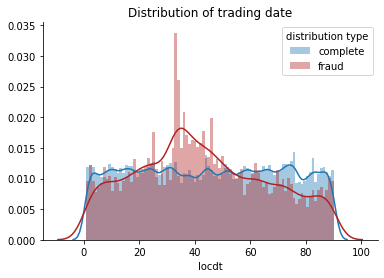

In [45]:
sns.distplot(df_train['locdt'], label='total', bins=90)
sns.distplot(fraud1['locdt'], label = 'fraud', color='firebrick', bins=90)
plt.legend(title='distribution type',loc='upper right', labels=['complete', 'fraud'])
plt.title("Distribution of trading date")
sns.despine()

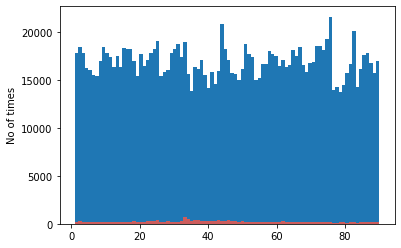

In [38]:
plt.hist(df_train['locdt'], bins=90, stacked=True)
plt.hist(fraud1['locdt'], bins=90, color='indianred', stacked=True)
plt.ylabel('No of times')
plt.show()

# 9. Distribution of trading time during a day on complete & fraud data (1000 bins) -- loctm

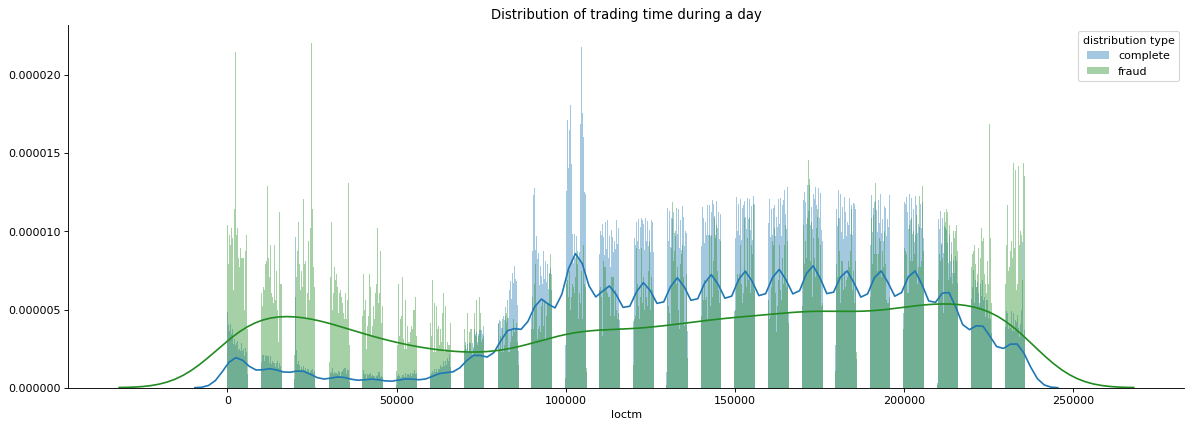

In [63]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(df_train['loctm'], label='total', bins = 1000)
sns.distplot(fraud1['loctm'], label = 'fraud', bins=1000, color='forestgreen')
plt.legend(title='distribution type',loc='upper right', labels=['complete', 'fraud'])
plt.title("Distribution of trading time during a day")
sns.despine()

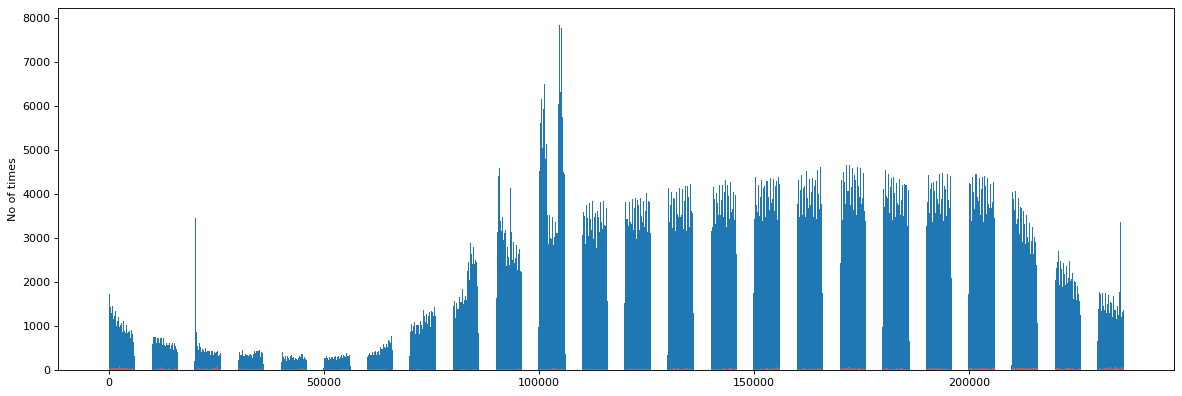

In [62]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(df_train['loctm'], bins=1000, stacked=True)
plt.hist(fraud1['loctm'], bins=1000, color='indianred', stacked=True)
plt.ylabel('No of times')
plt.show()

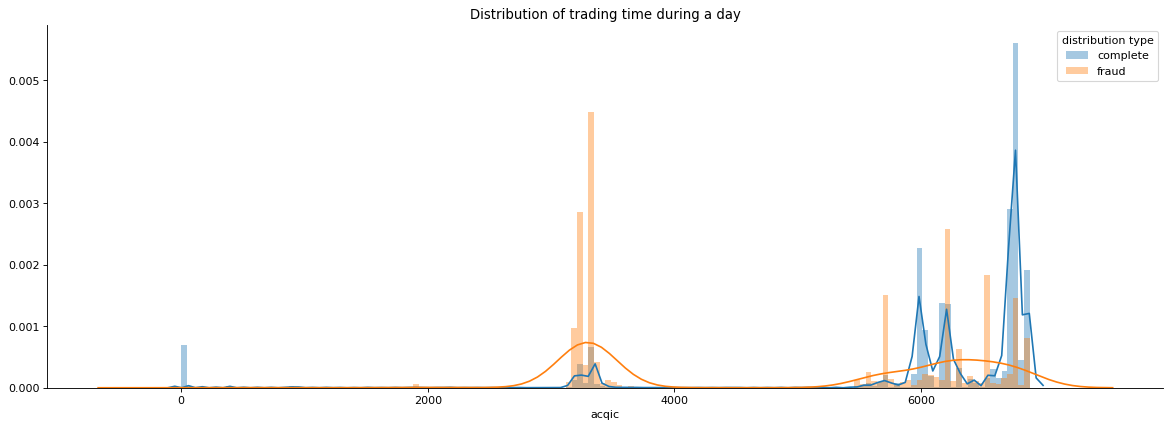

In [67]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(df_train['acqic'], label='total', bins = 150)
sns.distplot(fraud1['acqic'], label = 'fraud', bins=150)
plt.legend(title='distribution type',loc='upper right', labels=['complete', 'fraud'])
plt.title("Distribution of trading time during a day")
sns.despine()

# 10. Different ways of trading (etymd)

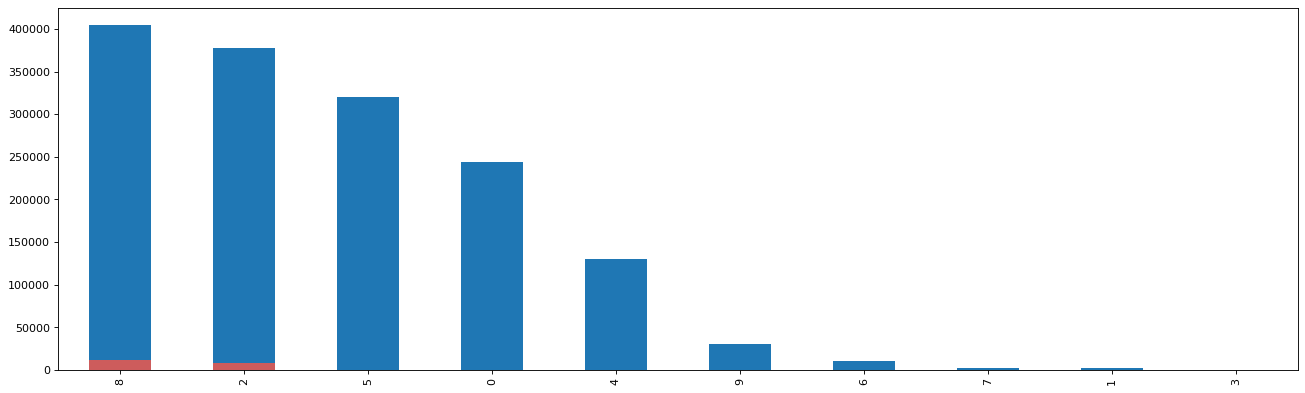

In [54]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
df_train['etymd'].value_counts().plot(kind='bar', stacked=True)
fraud1['etymd'].value_counts().plot(kind='bar', color='indianred', stacked=True)

# 11. Trading in different category (contp)

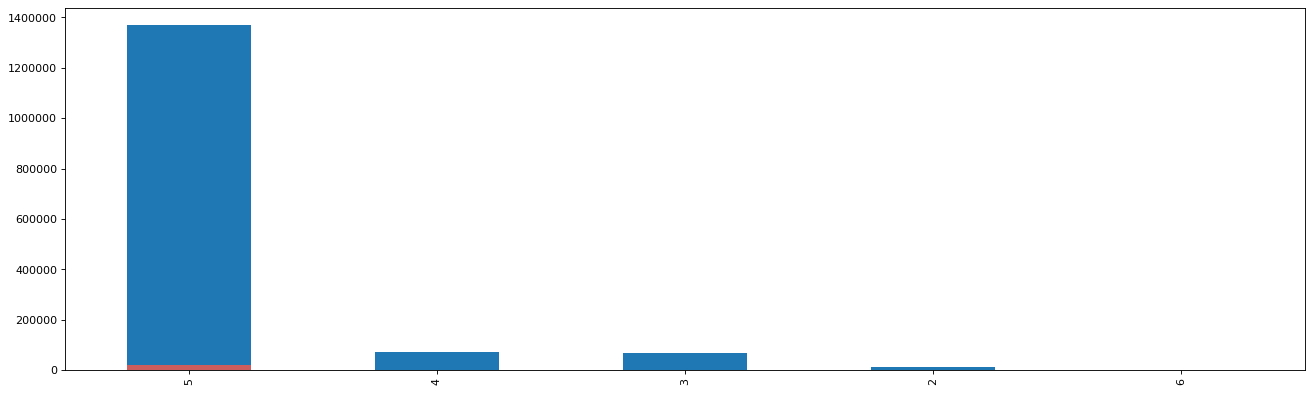

In [52]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
df_train['contp'].value_counts().plot(kind='bar', stacked=True)
fraud1['contp'].value_counts().plot(kind='bar', color='indianred', stacked=True)

# 12. Correltaion Matrix

C:\Users\ifeng_wu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


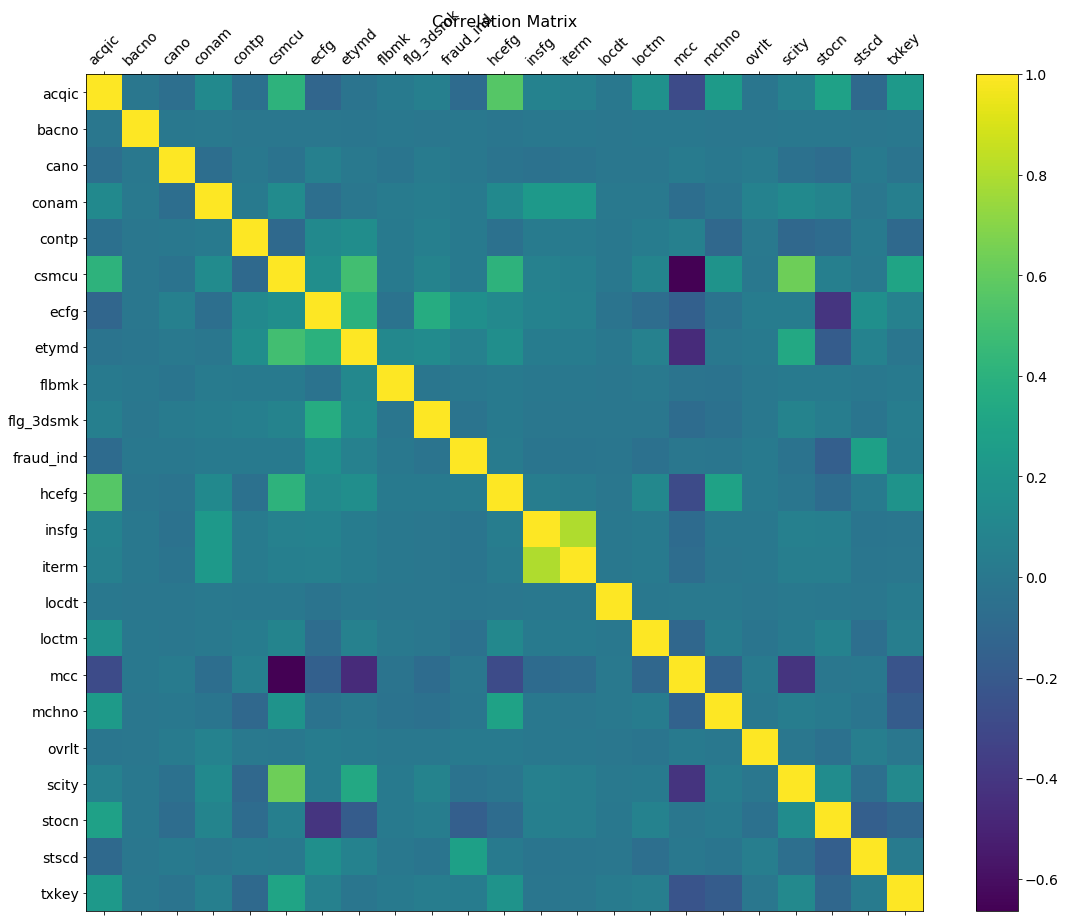

In [81]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_train.corr(), fignum=f.number)
plt.xticks(range(df_train.shape[1]), df_train.columns, fontsize=14, rotation=45)
plt.yticks(range(df_train.shape[1]), df_train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()

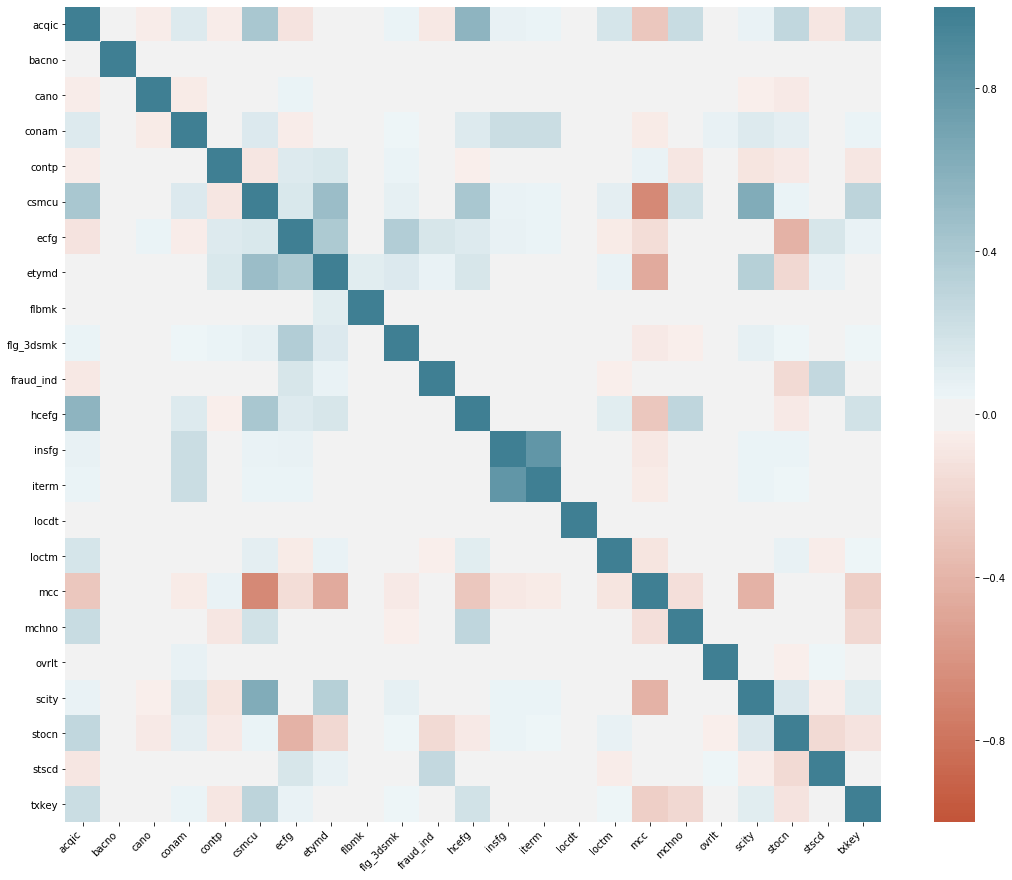

In [84]:
f = plt.figure(figsize=(19, 15))
corr = df_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);